# Proyecto Final

Descomprimimos cada uno de nuestros archivos *.zip* y los almacenamos en una carpeta llamada *dataset*.

In [1]:
from zipfile import ZipFile

# Le hacemos un unzip a nuestro conjunto de entrenamiento.
with ZipFile('dataset/train.csv.zip', 'r') as zipObj:
    zipObj.extractall('dataset')

# Le hacemos un unzip a nuestro conjunto de prueba.
with ZipFile('dataset/test.csv.zip', 'r') as zipObj:
    zipObj.extractall('dataset')

Leemos los datos que contiene el archivo *train.csv*.

In [12]:
import pandas as pd

data_frame = pd.read_csv('dataset/train.csv')
data_frame.shape

# Visualizamos el dataframe con los primeros 10 datos. 
data_frame.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [13]:
# Renombramos los datos de la variable 'label'. 
data_frame["label"] = data_frame["label"].replace({0:'REAL', 1:'FAKE'})

In [14]:
# Obtenemos las etiquetas de cada uno de los artículos.
labels = data_frame.label

# Visualizamos las primeras 10 etiquetas.
labels.head(10)

0    FAKE
1    REAL
2    FAKE
3    FAKE
4    FAKE
5    REAL
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

In [17]:
from sklearn.model_selection import train_test_split

# Dividimos nuestro conjunto de datos con un split del 75-25 para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(data_frame['text'], labels, test_size = 0.25, random_state = 7)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inicializamos un TfidfVectorizer. 
v = TfidfVectorizer(stop_words = 'english', max_df = 0.7)

In [37]:
import numpy as np

# Entrenamos y transformamos el conjunto de entrenamiento.
v_train = v.fit_transform(X_train.apply(lambda x: np.str_(x))) 

# Transformamos el conjunto de prueba.
v_test =v.transform(X_test.apply(lambda x: np.str_(x)))

In [39]:
from sklearn.linear_model import PassiveAggressiveClassifier

# Inicializamos un PassiveAggressiveClassifier.
pac = PassiveAggressiveClassifier(max_iter = 100)

# Entrenamos nuestro clasificador.
pac.fit(v_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

In [41]:
# Predecimos en el conjunto de prueba.
prediction = pac.predict(v_test) 

In [42]:
from sklearn.metrics import accuracy_score

# Obtenemos la precisión.
score = accuracy_score(y_test, prediction)
print(f'Accuracy: {round(score * 100, 2)}%')

Accuracy: 96.33%


In [33]:
import matplotlib.pyplot as plt
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


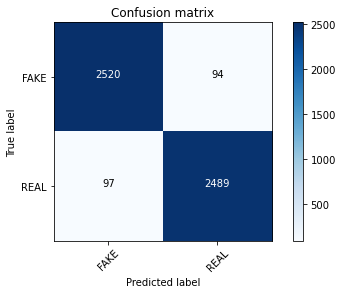

In [43]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

# Obtenemos la matriz de confusión.
confusion_matrix(y_test, prediction, labels = ['FAKE','REAL'])

cm = metrics.confusion_matrix(y_test, prediction, labels=['FAKE', 'REAL'])

# Visualizamos la matriz de confusión.
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

## VS

Podemos notar que la precisón para detectar *fake news* es mayor utilizando el algoritmo *pasivo-agresivo*, ya que obtenemos un $96.33\%$. 